In [11]:
import easygraph as eg
import csv
import pandas as pd
nodes=[]
nodes_attr=[]
edges=[]
edges_attr=[]

def make_graph(journal:str,time:list):
    G=eg.Graph()
    
    f=open('faculty-coauthors.csv','r')
    next(f)
    csv_reader=csv.reader(f)
    for row in csv_reader:
        if(int(row[6]) in time and str(row[7])==journal):
            i=str(row[2])
            j=str(row[5])
            year=int(row[6])
            if i not in nodes:
                nodes.append(i)
            if j not in nodes:
                nodes.append(j)
            
            if (i,j) in edges:
                index=edges.index((i,j))
                edges_attr[index]['weight']+=1
            else:
                edges.append((i,j))
                temp3={}
                temp3['weight']=1
                edges_attr.append(temp3)

    G.add_nodes(nodes)
    G.add_edges(edges,edges_attr)
    return G



In [12]:
# draw weight journal year
# 14-21 18-21 99-21
# tcss tsc socnet
# country

"""
# tcss - 2014-2017
time=[2014,2015,2016,2017]
G1=make_graph('tcss',time)
# tcss - 2018-2021
time=[2018,2019,2020,2021]
G2=make_graph('tcss',time)
"""

"""
# tsc - 2018-2019
time=[2018,2019]
G1=make_graph('tsc',time)
# tsc - 2020-2021
time=[2020,2021]
G2=make_graph('tsc',time)


"""
# socnet - 1999-2010
time=[1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]
G1=make_graph('socnet',time)
# socnet - 2011-2021
time=[2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]
G2=make_graph('socnet',time)


In [13]:
print(len(G1),G1.size())

25 52


In [14]:
print(len(G2),G2.size())

44 139


In [15]:
import pandas as pd
def degree_cdf(G1,G2):
    D1=G1.degree()
    D2=G2.degree()

    data=[]
    for i in D1:
        data.append(D1[i])
    for i in G1.nodes:
        if i not in D1:
            data.append(0)
    f1 = open('/users/sds/downloads/degree1.csv','w',encoding='utf-8')
    csv_writer = csv.writer(f1)
    for i in range(0,len(data)):
        csv_writer.writerow([data[i]])
    f1.close()

    data=[]
    for i in D2:
        data.append(D2[i])
    for i in G2.nodes:
        if i not in D2:
            data.append(0)
    f2 = open('/users/sds/downloads/degree2.csv','w',encoding='utf-8')
    csv_writer = csv.writer(f2)
    for i in range(0,len(data)):
        csv_writer.writerow([data[i]])
    f2.close()
    
degree_cdf(G1,G2)

In [16]:
import networkx as nx

Gn1=nx.Graph()
for i in G1.edges:
    (u,v,t)=i
    Gn1.add_edge(u,v)

Gn2=nx.Graph()
for i in G2.edges:
    (u,v,t)=i
    Gn2.add_edge(u,v)

In [17]:
def pr_cdf(Gn1,Gn2):
    P1=nx.pagerank(Gn1,alpha=0.85)
    data=[]
    for i in P1:
        data.append(P1[i])
    f1 = open('/users/sds/downloads/pagerank1.csv','w',encoding='utf-8')
    csv_writer = csv.writer(f1)
    for i in range(0,len(data)):
        csv_writer.writerow([data[i]])
    f1.close()


    P2=nx.pagerank(Gn2,alpha=0.85)
    data=[]
    for i in P2:
        data.append(P2[i])
    f2 = open('/users/sds/downloads/pagerank2.csv','w',encoding='utf-8')
    csv_writer = csv.writer(f2)
    for i in range(0,len(data)):
        csv_writer.writerow([data[i]])
    f2.close()

pr_cdf(Gn1,Gn2)

In [18]:
def cc_cdf(Gn1,Gn2):
    CC1=[len(c) for c in sorted(nx.connected_components(Gn1), key=len, reverse=True)]
    cc1={
        'size_of_cc':[]
    }
    for i in CC1:
        cc1['size_of_cc'].append(i)
    test=pd.DataFrame(cc1)
    test.to_csv('/users/sds/downloads/connected_components1.csv')
    
    CC2=[len(c) for c in sorted(nx.connected_components(Gn2), key=len, reverse=True)]
    cc2={
        'size_of_cc':[]
    }
    for i in CC2:
        cc2['size_of_cc'].append(i)
    test=pd.DataFrame(cc2)
    test.to_csv('/users/sds/downloads/connected_components2.csv')

cc_cdf(Gn1,Gn2)

In [19]:
def pl_cdf(Gn1,Gn2):
    LCC1=nx.Graph()
    c=max(nx.connected_components(Gn1),key=len)
    c=list(c)
    LCC1=Gn1.subgraph(c).copy()

    pl1={}
    for i in LCC1.nodes:
        for j in LCC1.nodes:
            t=nx.shortest_path_length(LCC1,i,j)
            if t!=0:
                if t not in pl1:
                    pl1[t]=1
                else:
                    pl1[t]+=1

    LCC2=nx.Graph()
    c=max(nx.connected_components(Gn2),key=len)
    c=list(c)
    LCC2=Gn2.subgraph(c).copy()

    pl2={}
    for i in LCC2.nodes:
        for j in LCC2.nodes:
            t=nx.shortest_path_length(LCC2,i,j)
            if t!=0:
                if t not in pl2:
                    pl2[t]=1
                else:
                    pl2[t]+=1

    PL1={
        'path_length':[],
        'num_of_path_length':[]
    }
    for i in pl1:
        PL1['path_length'].append(i)
        PL1['num_of_path_length'].append(pl1[i])
    test=pd.DataFrame(PL1)
    test.to_csv('/users/sds/downloads/path_length1.csv')
    
    PL2={
        'path_length':[],
        'num_of_path_length':[]
    }
    for i in pl2:
        PL2['path_length'].append(i)
        PL2['num_of_path_length'].append(pl2[i])
    test=pd.DataFrame(PL2)
    test.to_csv('/users/sds/downloads/path_length2.csv')
    
pl_cdf(Gn1,Gn2)

In [20]:
import pandas as pd


def constraint_cdf(G1,G2):
    constraint=eg.constraint(G1)
    data=[]
    for i in G1:
        data.append(float(constraint[i]))
    f1 = open('/users/sds/downloads/constraint1.csv','w',encoding='utf-8')
    csv_writer = csv.writer(f1)
    for i in range(0,len(data)):
        csv_writer.writerow([data[i]])
    f1.close()
    
    constraint=eg.constraint(G2)
    data=[]
    for i in G2:
        data.append(float(constraint[i]))
    f2 = open('/users/sds/downloads/constraint2.csv','w',encoding='utf-8')
    csv_writer = csv.writer(f2)
    for i in range(0,len(data)):
        csv_writer.writerow([data[i]])
    f2.close()

constraint_cdf(G1,G2)

In [ ]:
# main country bar

# degree
# betweenness centrality
# effective size
# efficiency
# constraint
# hierarchy
# clustering coefficient
# page rank
# top10
# page length
# robustness

# country 国家内
# country1 and country2 国家间

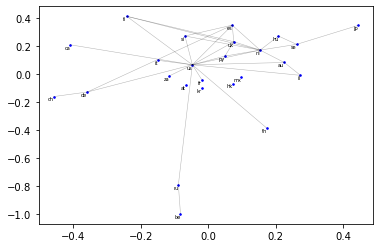

In [22]:
eg.draw_kamada_kawai(G1)

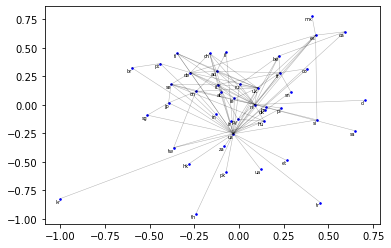

In [23]:
eg.draw_kamada_kawai(G2)